In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
apt = pd.read_csv('19_22_apt.csv', encoding='utf-8')
apt.head()

,건축년도,거래년도,거래월,법정동,거래금액,아파트이름,전용면적,층,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,1988,2020,6,개포동,149500,개포2차현대아파트(220),77.75,4,23.52,23,"(20, 25]",상반기,2분기,6500.000000,서울특별시,강남구
1,1987,2020,2,개포동,144000,개포6차우성아파트1동~8동,54.98,4,16.63,16,"(15, 20]",상반기,1분기,9000.000000,서울특별시,강남구
2,1987,2020,6,개포동,162750,개포6차우성아파트1동~8동,79.97,4,24.19,24,"(20, 25]",상반기,2분기,6781.250000,서울특별시,강남구
3,1987,2020,6,개포동,160000,개포6차우성아파트1동~8동,79.97,5,24.19,24,"(20, 25]",상반기,2분기,6666.666667,서울특별시,강남구
4,1987,2020,6,개포동,150000,개포6차우성아파트1동~8동,79.97,2,24.19,24,"(20, 25]",상반기,2분기,6250.000000,서울특별시,강남구


In [5]:
apt['거래년도'] = apt['거래년도'].astype('str')
apt['거래시기'] = apt['거래년도'] + '_' + apt['분기']
apt.head()

,건축년도,거래년도,거래월,법정동,거래금액,아파트이름,전용면적,층,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명,거래시기
0,1988,2020,6,개포동,149500,개포2차현대아파트(220),77.75,4,23.52,23,"(20, 25]",상반기,2분기,6500.000000,서울특별시,강남구,2020_2분기
1,1987,2020,2,개포동,144000,개포6차우성아파트1동~8동,54.98,4,16.63,16,"(15, 20]",상반기,1분기,9000.000000,서울특별시,강남구,2020_1분기
2,1987,2020,6,개포동,162750,개포6차우성아파트1동~8동,79.97,4,24.19,24,"(20, 25]",상반기,2분기,6781.250000,서울특별시,강남구,2020_2분기
3,1987,2020,6,개포동,160000,개포6차우성아파트1동~8동,79.97,5,24.19,24,"(20, 25]",상반기,2분기,6666.666667,서울특별시,강남구,2020_2분기
4,1987,2020,6,개포동,150000,개포6차우성아파트1동~8동,79.97,2,24.19,24,"(20, 25]",상반기,2분기,6250.000000,서울특별시,강남구,2020_2분기


In [69]:
def gu_tran(x):
    tran = {'종로구':'도심권','중구': '도심권','용산구': '도심권',
            '은평구':'서북권','서대문구': '서북권','마포구': '서북권',
            '강북구':'동북권','도봉구': '동북권','노원구':'동북권','성북구':'동북권','동대문구':'동북권','중랑구':'동북권','성동구':'동북권','광진구':'동북권',
            '강서구': '서남권','양천구': '서남권','영등포구': '서남권','구로구': '서남권','금천구': '서남권','동작구': '서남권','관악구': '서남권',
           '강남구': '동남권','송파구': '동남권','서초구': '동남권','강동구': '동남권'}
    return tran.get(x)

apt['권역'] = apt['시군구명'].apply(gu_tran)
apt.head()


,건축년도,거래년도,거래월,법정동,거래금액,아파트이름,전용면적,층,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명,거래시기,권역
0,1988,2020,6,개포동,149500,개포2차현대아파트(220),77.75,4,23.52,23,"(20, 25]",상반기,2분기,6500.000000,서울특별시,강남구,2020_2분기,동남권
1,1987,2020,2,개포동,144000,개포6차우성아파트1동~8동,54.98,4,16.63,16,"(15, 20]",상반기,1분기,9000.000000,서울특별시,강남구,2020_1분기,동남권
2,1987,2020,6,개포동,162750,개포6차우성아파트1동~8동,79.97,4,24.19,24,"(20, 25]",상반기,2분기,6781.250000,서울특별시,강남구,2020_2분기,동남권
3,1987,2020,6,개포동,160000,개포6차우성아파트1동~8동,79.97,5,24.19,24,"(20, 25]",상반기,2분기,6666.666667,서울특별시,강남구,2020_2분기,동남권
4,1987,2020,6,개포동,150000,개포6차우성아파트1동~8동,79.97,2,24.19,24,"(20, 25]",상반기,2분기,6250.000000,서울특별시,강남구,2020_2분기,동남권


# 지역별 평균 평당거래금액

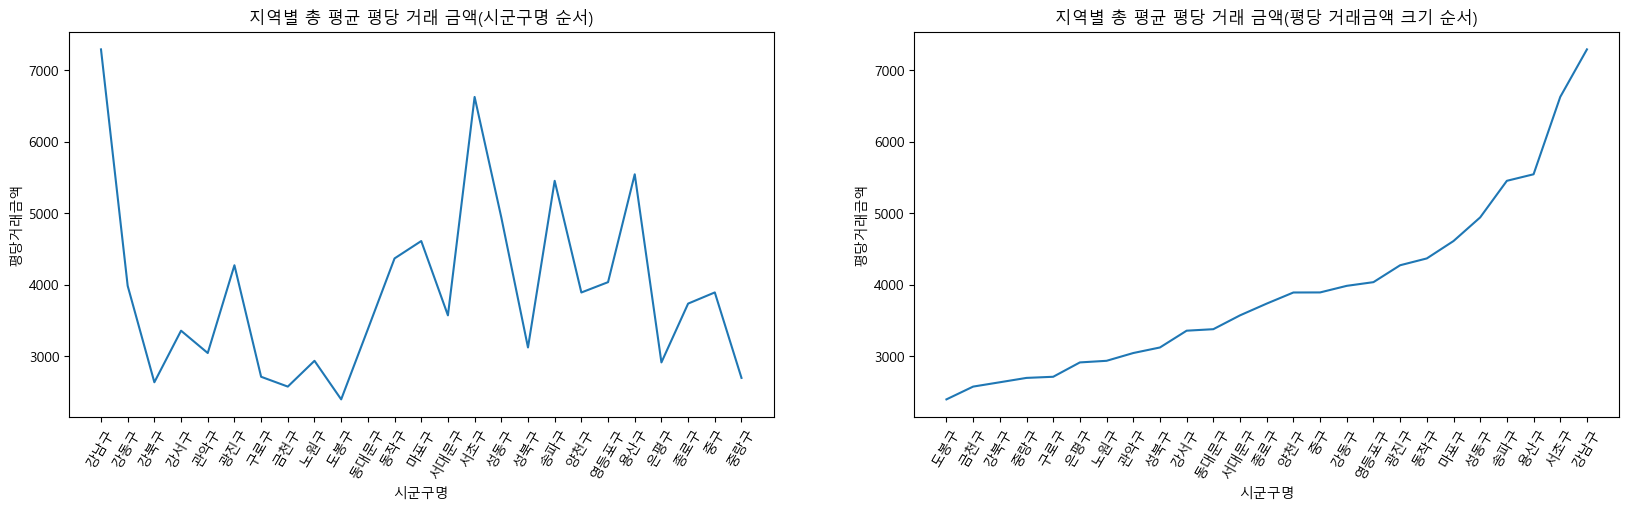

In [78]:
gubun_transaction = apt.groupby('시군구명').mean()[['평당거래금액']].reset_index(drop=False)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=gubun_transaction, x='시군구명', y='평당거래금액')
plt.xticks(rotation=60)
plt.title('지역별 총 평균 평당 거래 금액(시군구명 순서)')
plt.subplot(1, 2, 2)
sns.lineplot(data=gubun_transaction.sort_values(by='평당거래금액'), x='시군구명', y='평당거래금액')
plt.xticks(rotation=60)
plt.title('지역별 총 평균 평당 거래 금액(평당 거래금액 크기 순서)')
plt.show()

In [ ]:
pip install plotly

In [ ]:
pip install chart_studio

In [ ]:
pip install cufflinks

# 지역별 평균 평당거래금액(Plotly)

In [96]:
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline(connected=True)

gubun_transaction.iplot(kind='line', mode='lines+markers', x='시군구명', y='평당거래금액')

# 연도_분기별 평균 평당거래금액

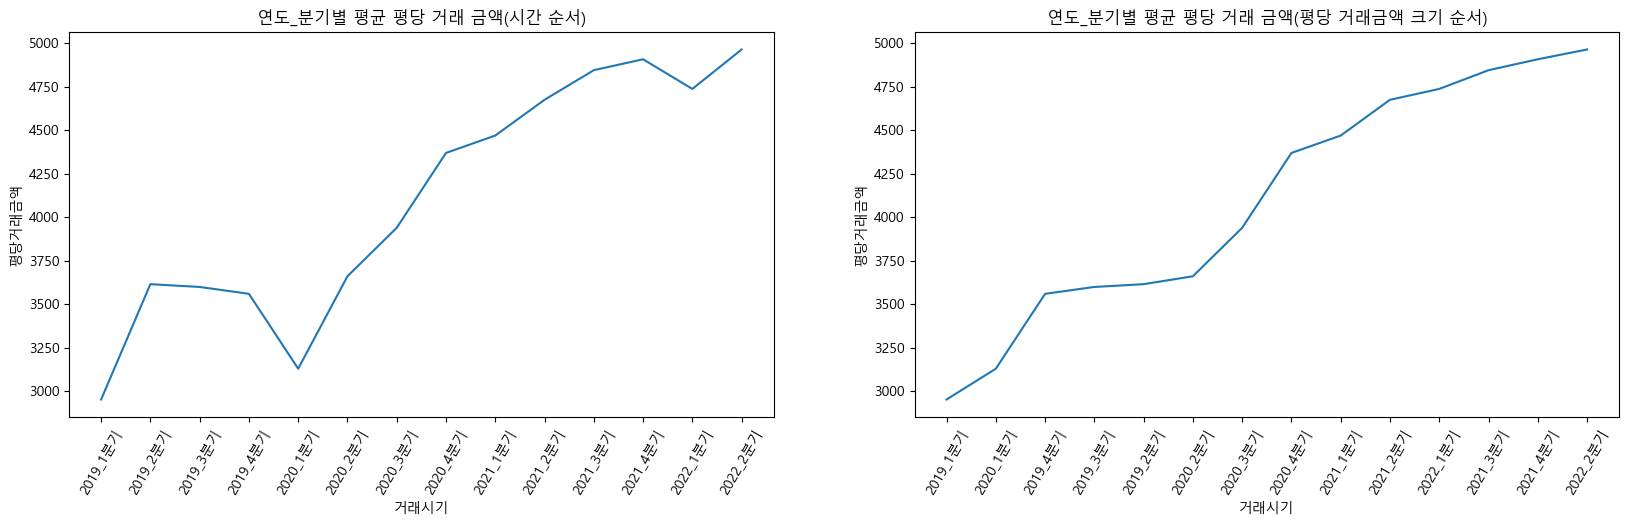

In [79]:
time_transaction = apt.groupby('거래시기').mean()[['평당거래금액']].reset_index(drop=False)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=time_transaction, x='거래시기', y='평당거래금액')
plt.xticks(rotation=60)
plt.title('연도_분기별 평균 평당 거래 금액(시간 순서)')
plt.subplot(1, 2, 2)
sns.lineplot(data=time_transaction.sort_values(by='평당거래금액'), x='거래시기', y='평당거래금액')
plt.xticks(rotation=60)
plt.title('연도_분기별 평균 평당 거래 금액(평당 거래금액 크기 순서)')
plt.show()


# 연도_분기별 평균 평당거래금액(Plotly)

In [97]:
time_transaction.iplot(kind='line', mode='lines+markers', x='거래시기', y='평당거래금액')

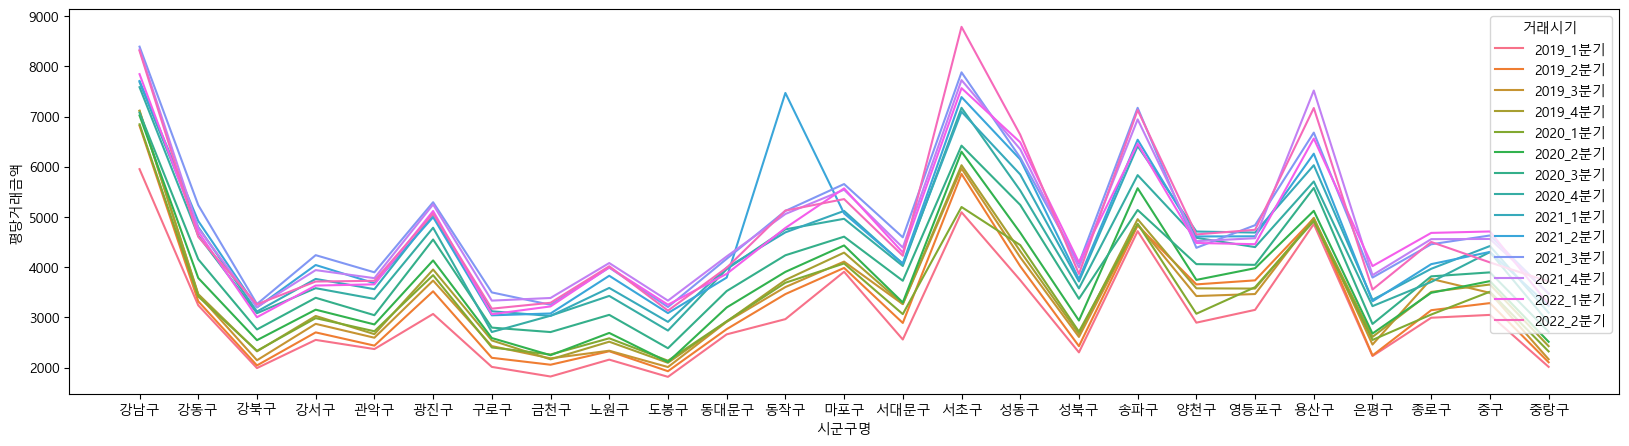

In [80]:
time_gubun = apt.groupby(['거래시기', '시군구명']).mean()[['평당거래금액']].reset_index(drop=False)
plt.figure(figsize=(20, 5))
sns.lineplot(data=time_gubun, x='시군구명', y='평당거래금액', hue='거래시기')
plt.title('')
plt.show()

In [115]:
import plotly.express as px
px.line(time_gubun, x='시군구명', y='평당거래금액', color='거래시기')

In [41]:
pip install folium


     -------------------------------------- 95.0/95.0 kB 605.5 kB/s eta 0:00:00


# 지역별 총 평균 평당거래금액(지도 이용)

In [117]:
#지역별 총 평균 평당거래금액
import json
import folium

geojson_path = 'map.geojson'

m = folium.Map(location=[37.5492, 127.0129], 
               zoom_start=12)
state_geo = json.load(open(geojson_path, encoding='utf-8'))
folium.Choropleth(
    geo_data=state_geo,
    data=gubun_transaction,
    columns=['시군구명', '평당거래금액'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='평균 평당 거래금액',
).add_to(m)
m